**Steps to be followed to implement the Twitter Sentiment Analysis:**
1. Load the datasets
2. Explore the datasets
3. Preprocess the dataset
4. Data Preparation
   1. Label Decode
   2. Split Data
   3. Feature Engineering
      1.  Bag of Words
      2.  Tf-Idf
5. Model Building
   1. Naive Bayes
   2. Logistic Regression
   3. Model Summary
6. Final Sentiment Analysis pipeline 

# 1. Load the datasets

In [2]:
# Import basic necessary modules
import pandas as pd
import numpy as np
import re
import spacy

# Creating spacy model
nlp = spacy.load("en_core_web_sm")

In [3]:
# Loading training dataset
train_df = pd.read_csv(filepath_or_buffer="../datasets/train.csv")

# Sample of training dataset
train_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
# Loading testing dataset
test_df = pd.read_csv(filepath_or_buffer="../datasets/test.csv")

# Sample of testing dataset
test_df.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


# 2. Exploring the dataset

In [5]:
# Info of training dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [6]:
# Info of testing dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


In [7]:
# Shape of training dataset
print("Shape of training dataset:",train_df.shape)

Shape of training dataset: (31962, 3)


In [8]:
# Shape of testing dataset
print("Shape of testing dataset:",test_df.shape)

Shape of testing dataset: (17197, 2)


In [9]:
if (train_df[train_df.notnull()].shape == train_df.shape):
    print("No Null values present in the dataset")
else:
    print("Please remove null values")

No Null values present in the dataset


In [10]:
def is_null_in_dataset(df: pd.DataFrame) -> None:
    if (df[df.notnull()].shape == df.shape):
        print("No Null values present in the dataset")
    else:
        print("Please remove null values")

In [11]:
# Check whether null values are in the dataset or not.
is_null_in_dataset(train_df)

No Null values present in the dataset


In [12]:
is_null_in_dataset(test_df)

No Null values present in the dataset


In [13]:
train_df["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [14]:
# Check whether training dataset is equally distributed or not
train_df["label"].value_counts(normalize=True)*100

0    92.98542
1     7.01458
Name: label, dtype: float64

In [15]:
# Description of the dataframe column
train_df["label"].describe()

count    31962.000000
mean         0.070146
std          0.255397
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: label, dtype: float64

In [16]:
# check the Skewness of the data
print("Skewness of the data is:",train_df["label"].skew())

Skewness of the data is: 3.366381217473261


In [17]:
# sample tweets in the dataset
train_df["tweet"].sample(10)

31549    great to chat with the guys at @user ahead of ...
23326     @user special thanks to @user !!!!!! thanks f...
7237     sole âï¸  #goodevening #sole #sun #milano #...
31080                                 #sam  b'day #hungry 
6015     movie-mad indians challenged to rewrite sexist...
18515    madrid by night...#madrid #cibeles #night #lig...
27414     @user new project on the way, and nothing can...
23703    when i feel   is a children's story about reco...
29603    i am thankful for having freedom. #thankful #p...
18987    @user you might be a libtard if... #libtard  #...
Name: tweet, dtype: object

# 3. Preprocessing the dataset

In [18]:
# Removing user mentions from a sample tweet
tweet = train_df["tweet"][3398]
print("Before Removal:",tweet)
print("After Removal:",re.sub(r"@\w+","",tweet))

Before Removal:  @user so many sycophants.....  
After Removal:   so many sycophants.....  


In [19]:
# Removing websites  from a sample tweet
tweet = train_df["tweet"][1111]
print("Before Removal:",tweet)
print("After Removal:",re.sub(r"www[\S]+","",tweet))

Before Removal: #fly   #and #better #with #us #buranus  #www.flybcc.com #call #7/24  #airbroker #flightâ¦ 
After Removal: #fly   #and #better #with #us #buranus  # #call #7/24  #airbroker #flightâ¦ 


In [20]:
# Removing &amp; from a sample tweet
tweet = train_df["tweet"][22]
print("Before Removal:",tweet)
print("After Removal:",re.sub(r"&amp;","",tweet))

Before Removal: product of the day: happy man #wine tool  who's   it's the #weekend? time to open up &amp; drink up!
After Removal: product of the day: happy man #wine tool  who's   it's the #weekend? time to open up  drink up!


In [21]:
# Removing all special characters like geek letter, hashtags, numbers, punctuations etc., from a sample tweet
tweet = train_df["tweet"][8423]
print("Before Removal:",tweet)
print("After Removal:",re.sub(r"[^a-zA-Z]+"," ",tweet))

Before Removal: good morning ððð have a blessed day ð¼ð #goodday #blessed #goodvibes #goodmorning   #healthâ¦ 
After Removal: good morning have a blessed day goodday blessed goodvibes goodmorning health 


In [22]:
# Removing all extra spaces from a sample tweet
tweet = train_df["tweet"][0]
print("Before Removal:",tweet)
print("After Removal:",re.sub(r"\s+"," ",tweet))

Before Removal:  @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
After Removal:  @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run


In [23]:
# Converting shortcuts to full forms
shortcuts = { "approx" : "approximately", "asap" : "as soon as possible", "brb": "be right back", "bro": "brother", "bruh": "brother",
            "btw" : "by the way", 'cud' : 'could', "cya" : "see you", "dm" : "direct message", "eg" : "example", 'fam' : 'family', 
            "faq" : "frequently asked questions", "fb" : "facebook", 'fud' : 'food', 'fyn' : 'fine', "gn" : "good night", "lol" : "laughing out loud", 
            "luv" : "love", 'lyk' : 'like', "og" : "original", "srsly" : "seriously", "tbh" : "to be honest", "thx" : "thanks", "u" : "you", 
            "ur" : "your", "wassup" : "what is up", 'wud' : 'would', "zzz" : "sleeping bored and tired" }
tweet = train_df["tweet"][2007]
print("Before Conversion:",tweet)
print("After Conversion:"," ".join([shortcuts[word] if word in shortcuts.keys() else word for word in tweet.split()]))

Before Conversion: we absolutely need it! thx u 
After Conversion: we absolutely need it! thanks you


In [24]:
# Function to preprocess the tweet
def preprocess_tweet(tweet: str) -> str:
    
    # convert tweet to lowercase
    tweet = tweet.lower()

    # Remove all user mentions in a tweet
    tweet = re.sub(r"@\w+","",tweet)

    # Remove all webistes in a tweet
    tweet = re.sub(r"www[\S]+","",tweet)

    # Remove "&amp;"" i.e., & in a tweet
    tweet = re.sub(r"&amp;","",tweet)

    # Remove all special characters like geek letter, hashtags, numbers, punctuations etc., from a tweet
    tweet = re.sub(r"[^a-zA-Z']+"," ",tweet)

    # Remove all the extra spaces from the tweet
    tweet = re.sub(r"\s+"," ",tweet)

    # Convert all shortcuts text to their original forms
    tweet = " ".join([shortcuts[word] if word in shortcuts.keys() else word for word in tweet.split()])

    # create a doc object for tweet
    doc = nlp(tweet)

    # creating lemmatized tokens (Contractions like you're, what's will be also be converted to "you are" and "what is")
    # Remove stop-words and lemmatize the tweet
    tweet = " ".join([token.lemma_ for token in doc if token.is_stop == False])

    # Removing apostrophe if there are any!
    tweet = re.sub(r"'","",tweet)

    return tweet

In [25]:
# Clean all tweets of training dataset
train_df["cleaned_tweet"] = train_df["tweet"].apply(preprocess_tweet)
train_df.head()

,id,label,tweet,cleaned_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank lyft credit use cause offer wheelchair v...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love time
4,5,0,factsguide: society now #motivation,factsguide society motivation


In [26]:
# Clean all tweets of testing dataset
test_df["cleaned_tweet"] = test_df["tweet"].apply(preprocess_tweet)
test_df.head()

,id,tweet,cleaned_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolife aislife require passion dedication ...
1,31964,@user #white #supremacists want everyone to s...,white supremacist want new bird movie s
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe way heal acne altwaystoheal healthy healing
3,31966,is the hp and the cursed child book up for res...,hp cursed child book reservation yes harrypott...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",rd bihday amazing hilarious nephew eli ahmir u...


In [27]:
# words in each cleaned tweet
train_df["words"] = train_df["cleaned_tweet"].apply(lambda x: [word for word in x.split()])
train_df.head()

,id,label,tweet,cleaned_tweet,words
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...,"[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0,@user @user thanks for #lyft credit i can't us...,thank lyft credit use cause offer wheelchair v...,"[thank, lyft, credit, use, cause, offer, wheel..."
2,3,0,bihday your majesty,bihday majesty,"[bihday, majesty]"
3,4,0,#model i love u take with u all the time in ...,model love time,"[model, love, time]"
4,5,0,factsguide: society now #motivation,factsguide society motivation,"[factsguide, society, motivation]"


In [28]:
# words in each cleaned tweet
test_df["words"] = test_df["cleaned_tweet"].apply(lambda x: [word for word in x.split()])
test_df.head()

,id,tweet,cleaned_tweet,words
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolife aislife require passion dedication ...,"[studiolife, aislife, require, passion, dedica..."
1,31964,@user #white #supremacists want everyone to s...,white supremacist want new bird movie s,"[white, supremacist, want, new, bird, movie, s]"
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe way heal acne altwaystoheal healthy healing,"[safe, way, heal, acne, altwaystoheal, healthy..."
3,31966,is the hp and the cursed child book up for res...,hp cursed child book reservation yes harrypott...,"[hp, cursed, child, book, reservation, yes, ha..."
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",rd bihday amazing hilarious nephew eli ahmir u...,"[rd, bihday, amazing, hilarious, nephew, eli, ..."


In [36]:
# positive and negative words in the dataset
positive_words = [word for words in train_df["words"].loc[train_df["label"] == 0] for word in words]
negative_words = [word for words in train_df["words"].loc[train_df["label"] == 1] for word in words]

positive_dict = dict()
negative_dict = dict()

for word in positive_words:
    positive_dict[word] = positive_dict.get(word,0) + 1

for word in negative_words:
    negative_dict[word] = negative_dict.get(word,0) + 1

positive_dict = dict(sorted(positive_dict.items(), key= lambda x: x[1], reverse=True))
negative_dict = dict(sorted(negative_dict.items(), key= lambda x: x[1], reverse=True))

print(positive_dict)
print(negative_dict)

{'love': 3073, 'day': 2892, 'happy': 1772, 'good': 1348, 'life': 1229, 'time': 1224, 'like': 1098, 'today': 1087, 'thankful': 952, 'new': 940, 'father': 939, 'positive': 935, 'smile': 917, 'bihday': 889, 'go': 866, 'people': 799, 'get': 798, 'work': 774, 'friend': 749, 'want': 741, 'come': 713, 'look': 692, 'wait': 641, 'family': 629, 'weekend': 624, 'fun': 616, 'need': 615, 'healthy': 612, 'feel': 609, 'week': 598, 'thank': 594, 'girl': 592, 'summer': 590, 'way': 555, 'friday': 540, 'find': 536, 'know': 532, 'great': 525, 'beautiful': 523, 'think': 518, 'year': 511, 'bull': 506, 'live': 484, 'morning': 473, 'music': 460, 'thing': 459, 'dad': 451, 'tomorrow': 449, 'home': 446, 'watch': 444, 'world': 438, 'cute': 433, 'sad': 430, 'fathersday': 430, 'orlando': 429, 'affirmation': 424, 'follow': 423, 'night': 414, 'make': 412, 'happiness': 398, 'sunday': 397, 'blog': 390, 'model': 389, 's': 362, 'right': 362, 'play': 353, 'man': 339, 'finally': 339, 'selfie': 332, 'amazing': 328, 'laugh':

In [30]:
# import libraries of wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [38]:
def generate_wordcloud(data: str, title: str) -> None:
    # create word cloud instance
    wc = WordCloud(width=800, height=500, max_words=200, max_font_size=100, background_color="white").generate_from_frequencies(data)

    # Setting the figure size
    plt.figure(figsize=(12,12))

    # Display word cloud as a image
    plt.imshow(wc, interpolation="bilinear", cmap="viridis")

    # Remove all the axes
    plt.axis("off")

    # set title to the wordcloud
    plt.title(title, color="orange", fontdict={"fontsize":20, "fontweight": 700}, pad=50.5)

    # Display the wordcloud
    plt.show()

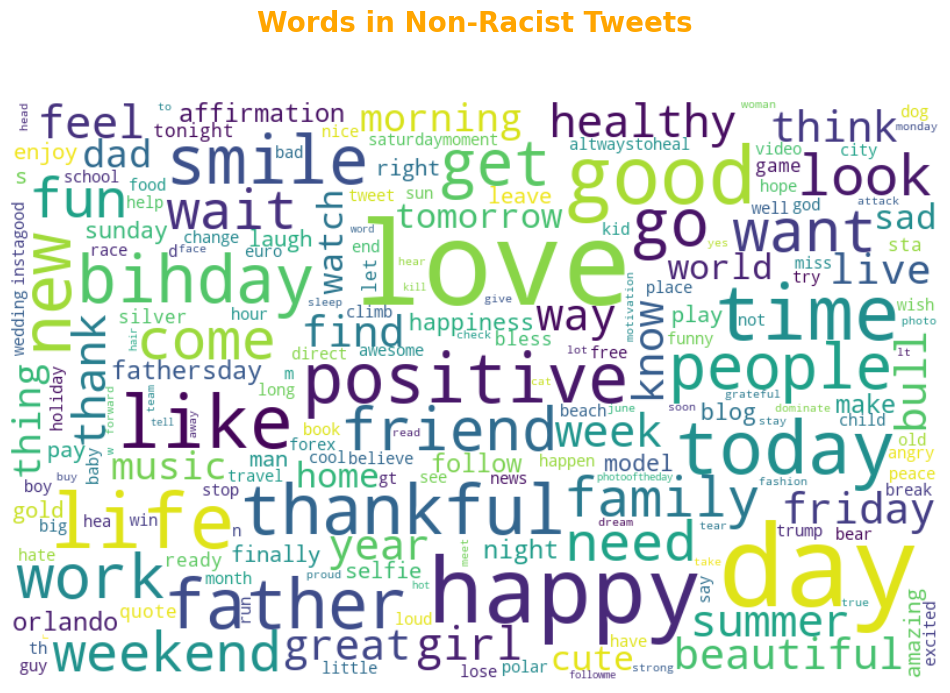

In [39]:
# Display wordcloud for positive words
generate_wordcloud(positive_dict, "Words in Non-Racist Tweets")

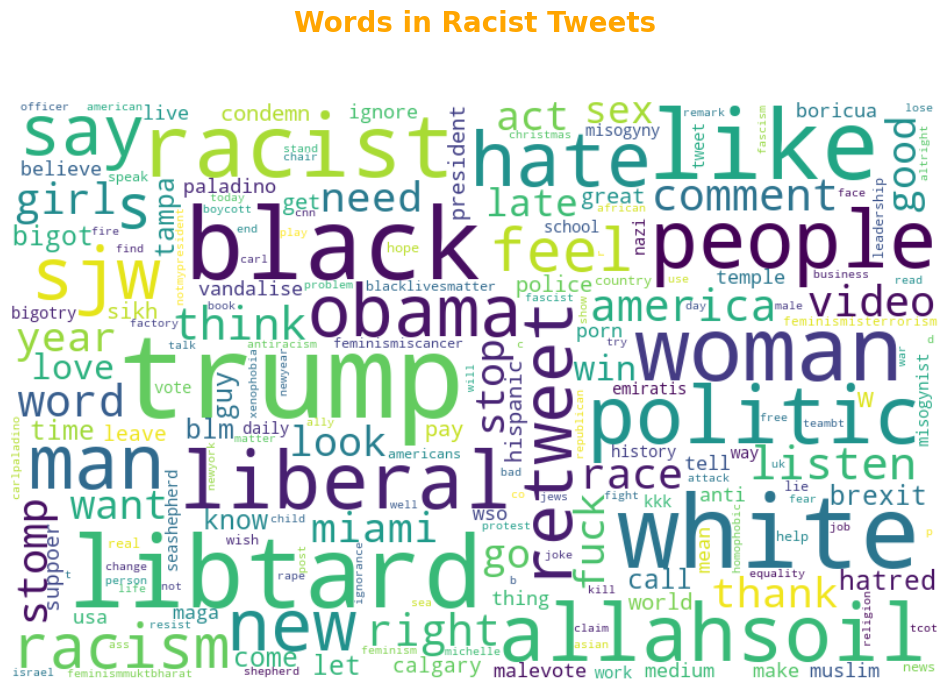

In [40]:
# Display wordcloud for negative words
generate_wordcloud(negative_dict, "Words in Racist Tweets")

# 4. Data Preparation

## 4.1 Label Decode

In [41]:
# Creating a dictionary for decoding label values 
label_decode = {0: "non-racist", 1: "racist"}

In [51]:
# Checking label decoder for a sample tweet
print(train_df["tweet"][1])
label_decode.get(train_df["label"][1])

@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked


'non-racist'

In [50]:
# Checking label decoder for a sample tweet
print(train_df["tweet"][14])
label_decode.get(train_df["label"][14])

no comment!  in #australia   #opkillingbay #seashepherd #helpcovedolphins #thecove  #helpcovedolphins


'racist'

## 4.2 Splitting the data

In [52]:
# Importing model_selection library for splitting the data
from sklearn.model_selection import train_test_split

In [54]:
# list of cleaned_tweets
cleaned_tweets = train_df["cleaned_tweet"].values

# list of binary labels
target = train_df["label"].values

In [55]:
# 10 sample tweets
cleaned_tweets[:10]

array(['father dysfunctional selfish drag kid dysfunction run',
       'thank lyft credit use cause offer wheelchair van pdx disapointe getthanke',
       'bihday majesty', 'model love time',
       'factsguide society motivation',
       'huge fan fare big talk leave chaos pay dispute allshowandnogo',
       'camping tomorrow danny',
       'school year year exam think school exam hate imagine actorslife revolutionschool girl',
       'win love land allin cavs champions cleveland clevelandcavalier',
       'welcome gr'], dtype=object)

In [59]:
# 10 sample labels
target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [60]:
# Split the data into training and validating sets
x_train, x_valid, y_train, y_valid = train_test_split(cleaned_tweets, target, test_size=0.2, random_state=0, shuffle=True, stratify=target)

In [70]:
# Shapes of training and validation sets
print("x.train:",x_train.shape,"y.train:",y_train.shape)
print("x.valid:",x_valid.shape,"y.valid:",y_valid.shape)

x.train: (25569,) y.train: (25569,)
x.valid: (6393,) y.valid: (6393,)


In [66]:
# Sample training set of tweets
x_train[:10]

array(['happy father day father fathersday child dad',
       'hold tear cry happy tear finally leave week tomorrow canadianraver',
       'survive june end mental institution finish story tired',
       'way ctf book talk inmate paicipate book club program slugg',
       'peppa pig birds finger family nursery rhyme lyric',
       'get job show tell day instead unprofessional',
       'transformer blow neighborhood stick w o power hopefully long food fridge w o coldness blackout',
       'friend single relationship like fuck',
       'play karen marie garrett finale rose music song',
       'brunch balconyview brunch sundaybrunch sunday istanbul love girl instalike'],
      dtype=object)

In [67]:
# Sample validation set of tweets
x_valid[:10]

array(['laugh loud look fox premiere news cast like tv thou try exciting',
       'update social analytic garmin arduino iger design',
       'come chuckie cheese kid',
       'friday weekend follower tgif fridayfeeling',
       'yep exactly care player drive pageclick counter',
       'm go to lie think angela pretty season air see true color mad',
       'leave house autism testing drive half hour happy autism autismawareness',
       'personalise swirl bracket ro gbp shop cool home fun',
       'prevent bigot',
       'sad udtapunjableaked happen stay strong team kareena'],
      dtype=object)

In [68]:
# Sample training set of labels
y_train[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [69]:
# Sample validation set of labels
y_valid[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

## 4.3 Feature Engineering

### 4.3.1 Bag of Words

In [71]:
# Importing libraries for feature engineering
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [73]:
# create an object for CoutVectiorizer
word_vector_BoW = CountVectorizer(binary=False, # Count the occurances of terms instead of check their presence
                                lowercase= True, # Text to lowercase
                                max_df=400, # Max Dataframe size
                                min_df=15 # Min dataframe size
                                )

In [75]:
# Fit and transform the training data
word_BoW = word_vector_BoW.fit_transform(cleaned_tweets)

In [77]:
# Shape of the matrix
word_BoW

<31962x1967 sparse matrix of type '<class 'numpy.int64'>'
	with 109187 stored elements in Compressed Sparse Row format>

In [79]:
# Document representation
vocab = word_vector_BoW.get_feature_names_out()

# Dataframe for BoW representation
pd.DataFrame(word_BoW.toarray(),columns=vocab)

,aap,able,absolutely,abt,abuse,accept,account,achieve,acne,act,...,you,young,youth,youtube,youtuber,yr,yrs,yum,yummy,zen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31960,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [81]:
# create an object for CoutVectiorizer
word_vector_bigram_BoW = CountVectorizer(binary=False, # Count the occurances of terms instead of check their presence
                                lowercase= True, # Text to lowercase
                                max_df=400, # Max Dataframe size
                                min_df=15, # Min dataframe size
                                ngram_range=(2,2) # Bigram Model
                                )

In [84]:
# Fit and transform the training data
word_bigram_BoW = word_vector_bigram_BoW.fit_transform(cleaned_tweets)

In [86]:
# Shape of the matrix
word_bigram_BoW

<31962x434 sparse matrix of type '<class 'numpy.int64'>'
	with 18116 stored elements in Compressed Sparse Row format>

In [88]:
# Document representation
vocab = word_vector_bigram_BoW.get_feature_names_out()

# Dataframe for bigram_BoW representation
pd.DataFrame(word_bigram_BoW.toarray(),columns=vocab)

,adapt environment,altwaystoheal healing,altwaystoheal healthy,angry bird,angry polar,angry visit,antiracism seashepherd,anxiety healthy,app free,astrologer love,...,wish happy,wonderful dad,work altwaystoheal,work conference,work mindset,wso condemn,yeah good,year ago,year old,yr old
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


**Note:** There is so much sparsity while representing features in Bag of words representation. 

### 4.3.2 Tf-Idf

In [103]:
# Creating an object for TfIdf Vectorizer
word_vectorize = TfidfVectorizer(max_features=2000)

In [104]:
# fit the training using tfidf vectorizer
word_vectorize.fit(x_train)

TfidfVectorizer(max_features=2000)

In [105]:
# Create tf-idf vectors for training data
train_word_features = word_vectorize.transform(x_train)
train_word_features

<25569x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 119969 stored elements in Compressed Sparse Row format>

In [106]:
# Create tf-idf vectors for training data
valid_word_features = word_vectorize.transform(x_valid)
valid_word_features

<6393x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 29640 stored elements in Compressed Sparse Row format>